# Assignment 1
## Data Collection & Preparation

####  API ที่เลือก :

Crash data from Queensland roads

Road crash locations เป็นข้อมูลเกี่ยวกับสถานที่และลักษณะของการขัดข้องภายในประเทศควีนส์แลนด์ สำหรับการจราจรบนถนนที่รายงานทั้งหมด --- 1 มกราคม 2544 ถึง 31 ธันวาคม 2561---


#### หมายเหตุ :
- อุบัติเหตุจราจรทางถนนร้ายแรง เก็บข้อมูลถึงวันที่ 31 ธันวาคม 2561 
- การรักษาในโรงพยาบาลการรักษาพยาบาลและการบาดเจ็บเล็กน้อย เก็บข้อมูลถึง 31 ธันวาคม 2561
- ความเสียหายต่อทรัพย์สินเท่านั้น เก็บข้อมูลถึงวันที่ 31 ธันวาคม 2553

link API : https://www.data.qld.gov.au/dataset/crash-data-from-queensland-roads/resource/e88943c0-5968-4972-a15f-38e120d72ec0?truncate=30&inner_span=True

### ไม่ต้องกดรันนะจ๊ะ

In [1]:
import urllib
import requests
from pandas.io.json import json_normalize
import json
import pandas as pd
import numpy as np
import requests

#Request API
url = 'https://www.data.qld.gov.au/api/3/action/datastore_search?resource_id=e88943c0-5968-4972-a15f-38e120d72ec0&limit=29000'
r = requests.get(url) #แปลง API Request ตัวแปร r ให้เป็น dict
j = r.json() 

###ไม่ต้องกดรันนะจ๊ะ

### ไม่ต้องกดรันนะจ๊ะ

In [3]:
type(j) #ตรวจสอบ type 

dict

In [22]:
#ดึงข้อมูลเพื่อแสดงค่าใน dict มาใส่ใน DataFrame โดยอ้างอิงจาก key:result และ key:records 
df = pd.DataFrame(j)
df = pd.DataFrame(j["result"]["records"])

In [23]:
#การ save DataFrame เป็นไฟล์ CSV ด้วย to_csv
df.to_csv("Data/Road_Crash_location.csv",index=False)

## เริ่มตรงนี้

In [250]:
#ทำการอ่านไฟล์ข้อมูลที่ดาวน์โหลดเก็บไว้ใน Folder เข้ามาใน pandas และเรียกดูข้อมูลโดยใช้ ชื่อของข้อมูลที่เรากำหนด ซึ่งในที่นี้ เรากำหนดชื่อว่า roaddata
roaddata = pd.read_csv("Data/Road_Crash_location.csv",index_col="_id")
roaddata

,Crash_Ref_Number,Crash_Severity,Crash_Year,Crash_Month,Crash_Day_Of_Week,Crash_Hour,Crash_Nature,Crash_Type,Crash_Longitude_GDA94,Crash_Latitude_GDA94,...,Count_Casualty_MedicallyTreated,Count_Casualty_MinorInjury,Count_Casualty_Total,Count_Unit_Car,Count_Unit_Motorcycle_Moped,Count_Unit_Truck,Count_Unit_Bus,Count_Unit_Bicycle,Count_Unit_Pedestrian,Count_Unit_Other
_id,,,,,,,,,,,,,,,,,,,,,
1,1,Property damage only,2001,January,Monday,9,Angle,Multi-Vehicle,152.960485,-26.685052,...,0,0,0,2,0,0,0,0,0,0
2,2,Property damage only,2001,January,Tuesday,23,Hit object,Single Vehicle,153.038263,-27.550776,...,0,0,0,1,0,0,0,0,0,0
3,3,Medical treatment,2001,January,Tuesday,16,Angle,Multi-Vehicle,153.116342,-27.545153,...,1,0,1,2,0,0,0,0,0,0
4,4,Property damage only,2001,January,Tuesday,12,Rear-end,Multi-Vehicle,153.021629,-27.384448,...,0,0,0,2,0,0,0,0,0,0
5,5,Property damage only,2001,January,Tuesday,10,Rear-end,Multi-Vehicle,152.937497,-27.083184,...,0,0,0,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28993,28993,Minor injury,2014,August,Tuesday,16,Angle,Multi-Vehicle,153.041664,-27.414289,...,0,1,1,2,0,0,0,0,0,0
28994,28994,Hospitalisation,2014,August,Tuesday,7,Angle,Multi-Vehicle,153.012600,-27.777425,...,0,0,1,2,0,0,0,0,0,1
28995,28995,Hospitalisation,2014,August,Wednesday,17,Angle,Multi-Vehicle,152.927540,-27.176794,...,0,0,1,1,0,0,0,0,0,0


In [251]:
roaddata.shape #เช็คจำนวนแถว และจำนวนคอลัมน์

(29000, 52)

In [252]:
roaddata.isnull().sum() #Check missing value

Crash_Ref_Number                       0
Crash_Severity                         0
Crash_Year                             0
Crash_Month                            0
Crash_Day_Of_Week                      0
Crash_Hour                             0
Crash_Nature                           0
Crash_Type                             0
Crash_Longitude_GDA94                  0
Crash_Latitude_GDA94                   0
Crash_Street                           2
Crash_Street_Intersecting          16220
State_Road_Name                    16113
Loc_Suburb                             0
Loc_Local_Government_Area              0
Loc_Post_Code                          0
Loc_Police_Division                    0
Loc_Police_District                    0
Loc_Police_Region                      0
Loc_Queensland_Transport_Region        0
Loc_Main_Roads_Region                  0
Loc_ABS_Statistical_Area_2             0
Loc_ABS_Statistical_Area_3             0
Loc_ABS_Statistical_Area_4             0
Loc_ABS_Remotene

#### ทำการจัดการกับ column ที่มี Missing Value 

In [253]:
#ลบ column ที่มี Missing Value 
roaddata.drop('DCA_Key_Approach_Dir', axis='columns', inplace=True)
roaddata.drop('Crash_Street_Intersecting', axis='columns', inplace=True)

In [254]:
#เพิ่มข้อมูลในแถวที่มี Missing Value ใน coulumn Crash_Streetและ State_Road_Name โดยการแทน "NON-VALUES" ใน Row ที่มีค่า null
roaddata["Crash_Street"] = roaddata["Crash_Street"].fillna("NON-VALUES")
roaddata["State_Road_Name"] = roaddata["Crash_Street"].fillna("NON-VALUES")

In [255]:
#ลบค่า Null ออกจากข้อมูล ลบออกจาก column Crash_DCA_Code และ Crash_DCA_Description
roaddata.dropna(subset=['Crash_DCA_Code'], inplace =True)
roaddata.dropna(subset=['Crash_DCA_Description'], inplace =True)
roaddata.isnull().sum()

Crash_Ref_Number                   0
Crash_Severity                     0
Crash_Year                         0
Crash_Month                        0
Crash_Day_Of_Week                  0
Crash_Hour                         0
Crash_Nature                       0
Crash_Type                         0
Crash_Longitude_GDA94              0
Crash_Latitude_GDA94               0
Crash_Street                       0
State_Road_Name                    0
Loc_Suburb                         0
Loc_Local_Government_Area          0
Loc_Post_Code                      0
Loc_Police_Division                0
Loc_Police_District                0
Loc_Police_Region                  0
Loc_Queensland_Transport_Region    0
Loc_Main_Roads_Region              0
Loc_ABS_Statistical_Area_2         0
Loc_ABS_Statistical_Area_3         0
Loc_ABS_Statistical_Area_4         0
Loc_ABS_Remoteness                 0
Loc_State_Electorate               0
Loc_Federal_Electorate             0
Crash_Controlling_Authority        0
C

#### การ Handling Outliers 
เป็นวิธีที่จัดการกับข้อมูลที่มีค่าสูงหรือค่าต่ำกว่าข้อมูลส่วนใหญ่


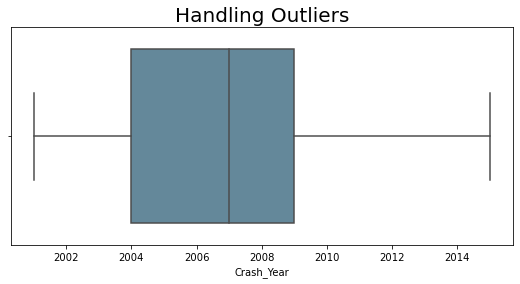

In [256]:
import seaborn as sns #import Library ที่จำเป็นต้องใช้ก่อน
from matplotlib import pyplot as plt 

#ทำ Data Visualization เพื่อดูการกระจายข้อมูล
fig = plt.figure(figsize=(9,4)) 
sns.boxplot(x=roaddata["Crash_Year"], color="#5b8ba3") #เรียกดูการกระจายข้อมูล ใน column : "Crash_Year"
plt.xlabel("Crash_Year", fontsize=10) 
plt.title('Handling Outliers', size = 20)
plt.show()

In [257]:
roaddata["Crash_Year"].describe() #ใช้ Function describe() เพื่อดูข้อมูลทางสถิติต่างๆ

count    28992.000000
mean      2006.654870
std          3.676431
min       2001.000000
25%       2004.000000
50%       2007.000000
75%       2009.000000
max       2015.000000
Name: Crash_Year, dtype: float64

In [258]:
# ลบแถวที่พบ Outlier ใน Column Crash_Year ที่น้อยกว่าหรือเท่ากับ Quantile 0.5 และมากกว่าหรือเท่ากับ Quantile 0.95 ด้วยเทคนิค Drop with Percentiles  
print(df.shape)
upper_lim = roaddata["Crash_Year"].quantile(.95)
lower_lim = roaddata["Crash_Year"].quantile(.05)
drop_outlier = roaddata[(roaddata["Crash_Year"] < upper_lim) & (roaddata["Crash_Year"] > lower_lim)]
print(drop_outlier.shape)

(23412, 4)
(24423, 50)


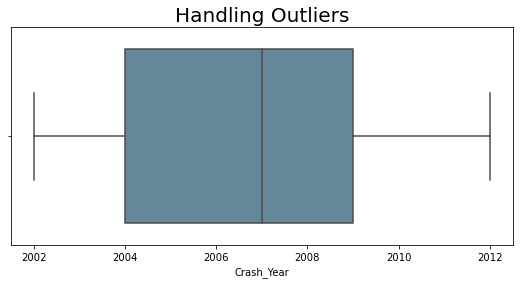

In [259]:
#ดู Data Visualization อีกรอบ
fig = plt.figure(figsize=(9,4))
sns.boxplot(x=drop_outlier["Crash_Year"], color="#5b8ba3")
plt.xlabel("Crash_Year", fontsize=10)
plt.title('Handling Outliers', size = 20)
plt.show()

In [260]:
drop_outlier["Crash_Year"].describe() #ดูข้อมูลทางสถิติต่างๆอีกรอบ

count    24423.000000
mean      2006.596323
std          2.975228
min       2002.000000
25%       2004.000000
50%       2007.000000
75%       2009.000000
max       2012.000000
Name: Crash_Year, dtype: float64

หลังจาก drop outlier แล้วผลลัพธ์ออกไม่พบ Outlier และค่าเฉลี่ยลดลงเพียงเล็กน้อยจาก 2006.65 ลดลงมา 2006.59 แต่ปีที่มากที่สุดลดลงจาก 2015 เหลือเพียง 2012

In [261]:
#หลังจากทำการลบแถวที่มี Outlier แล้วก็นำมาใส่ใน DataFrame เพื่อการวิเคราะห์ต่อไป
roaddata = pd.DataFrame(drop_outlier)
roaddata.shape 

(24423, 50)

-------------------------------------------------------------------------------------------------------------------------------

### ระดับความรุนแรงของการเกิดอุบัติเหตุประเภทใดมีอัตราการเกิดมากที่สุด?

In [262]:
roaddata.Crash_Severity.value_counts() #เรียกดูข้อมูล Crash Severity และ count ออกมาดูจำนวนในแต่ประเภท

Property damage only    8385
Medical treatment       6472
Hospitalisation         5875
Minor injury            3380
Fatal                    311
Name: Crash_Severity, dtype: int64

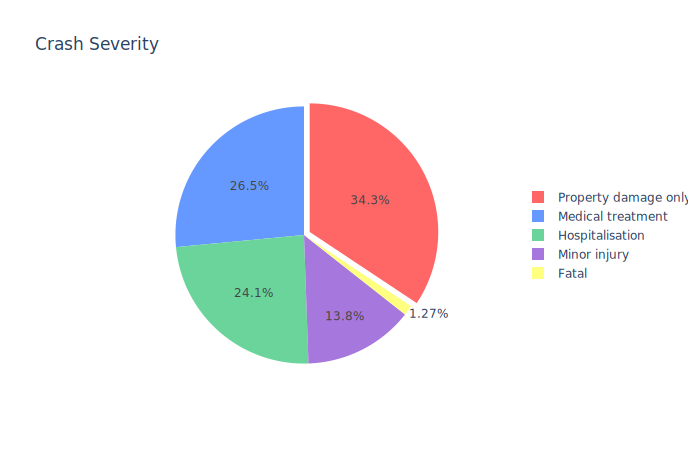

In [263]:
import plotly.io as pio
pio.renderers.default = "svg"
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

# ทำ data visualization ด้วยการ import plotly
## เลือก column ที่จะทำการวิเคราะห์ ในการวิเคราะห์นี้เลือกเป็น Crash_Severity 
### เพื่อวิเคราะห์หาว่าประเภทระดับความรุนแรงในการเกิดอุบัติเหตุประเภทไหนมีอัตราเกิดมากที่สุด

col = "Crash_Severity" # กำหนดตัวแปร col เท่ากับ Crash Severity 
grouped = roaddata[col].value_counts().reset_index() # ทำการ count value ใน column "Crash_Severity"
grouped = grouped.rename(columns = {col : "count", "index" : col}) 

# ส่วนของ plot 

trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=["#ff6666","#6699ff","#6ad49b", "#a678de","#ffff80"])) 
layout = go.Layout(title="Crash Severity ", height=400, legend=dict(x=1, y=0.5, font_size=12))
fig = go.Figure(data = [trace], layout = layout)
fig.show(renderer='svg')


ระดับความรุนแรงของการเกิดอุบัติเหตุส่วนใหญ่เป็นประเภท Property damage only คิดเป็นร้อยละ 34.4% 

### ประเภทความรุนแรงของการเกิดอุบัติเหตุในแต่ละปี?
ในส่วนนี้อยากวิเคราะห์ว่าปีและประเภทความรุนแรงใดเกิดมากที่สุด

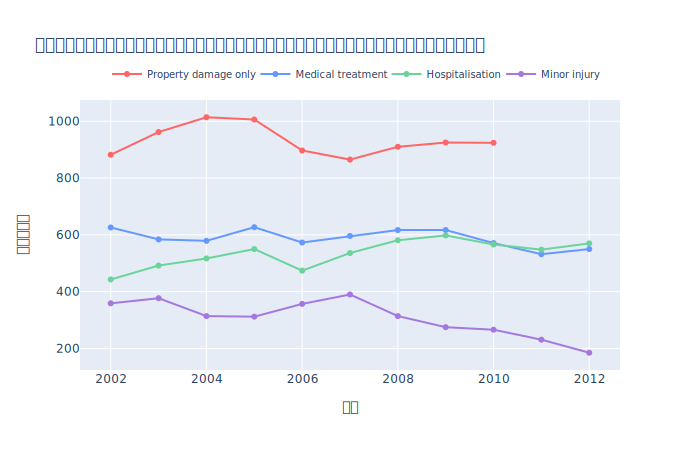

In [264]:
#ตัวแปร d1 d2 d3 และ d4 คือเพื่อเก็บประเภทความรุนแรงแต่ละประเภท 
d1 = roaddata[roaddata["Crash_Severity"] == "Property damage only"]
d2 = roaddata[roaddata["Crash_Severity"] == "Medical treatment"]
d3 = roaddata[roaddata["Crash_Severity"] == "Hospitalisation"]
d4 = roaddata[roaddata["Crash_Severity"] == "Minor injury"]

#เก็บค่าตัวแปร Year
col = "Crash_Year" 

# count value แต่ละปีและประเภท
vc1 = d1[col].value_counts().reset_index() 
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2 = vc2.sort_values(col)

vc3 = d3[col].value_counts().reset_index()
vc3 = vc3.rename(columns = {col : "count", "index" : col})
vc3 = vc3.sort_values(col)

vc4 = d4[col].value_counts().reset_index()
vc4 = vc4.rename(columns = {col : "count", "index" : col})
vc4 = vc4.sort_values(col)

#Line Graph
trace1 = go.Scatter(x=vc1[col], y=vc1["count"], name="Property damage only", marker=dict(color="#ff6666"))
trace2 = go.Scatter(x=vc2[col], y=vc2["count"], name="Medical treatment", marker=dict(color="#6699ff"))
trace3 = go.Scatter(x=vc3[col], y=vc3["count"], name="Hospitalisation", marker=dict(color="#6ad49b"))
trace4 = go.Scatter(x=vc4[col], y=vc4["count"], name="Minor injury", marker=dict(color="#a678de"))
data = [trace1, trace2, trace3,trace4]

# layout แสดงผลใน Line Graph
layout = go.Layout(title="ประเภทความรุนแรงของการเกิดอุบัติเหตุในแต่ละปี", xaxis_title="ปี",
    yaxis_title="จำนวน",legend=dict(x=0.05, y=1.15, orientation="h" , font_size=10))
fig = go.Figure(data, layout=layout )
fig.show(renderer='svg') 

จากกราฟโดยรวมแล้วจะเห็นได้ว่า ในปี 2004 มีจำนวนความรุนแรงของการเกิดอุบัติเหตุในกรณีที่เป็น Property damage only (ทรัพย์สินเสียหายเท่านั้น ) มากที่สุด และ ความรุนแรงของการเกิดอุบัติเหตุในกรณีที่เป็น Property damage only ยังมีสถิติมากที่สุดในทุกๆปีอีกด้วย

หมายเหตุ
- ความเสียหายต่อทรัพย์สินเท่านั้น เก็บข้อมูลถึงวันที่ 31 ธันวาคม 2010

จากการวิเคราะห์ข้างต้นที่ได้หาว่าปีและประเภทความรุนแรงใดเกิดมากที่สุดได้แล้วได้ ทำให้เกิดความสงสัยว่าในปี 2004 มีจำนวนการเกิดอุบัติเหตุในกรณีที่เป็น Property damage only เดือนใดเกิดอุบัติเหตุมากสุด?

In [265]:
#กำหนดปี 2004 และ ประเภทของ Crash Severity = Property damage only ในตัวแปรก่อน
roaddata_y = roaddata[(roaddata['Crash_Year'] == 2004)].reset_index(drop=True) 
d1 = roaddata_y[roaddata_y["Crash_Severity"] == "Property damage only"]

col = "Crash_Month"

#หาจำนวนและเปอร์เซ็นต์
vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1

,Crash_Month,count,percent
0,March,103,10.157791
1,October,96,9.467456
2,April,93,9.171598
3,August,92,9.072978
4,July,91,8.974359
5,May,89,8.777120
6,December,82,8.086785
7,September,81,7.988166
8,January,76,7.495069
9,November,76,7.495069


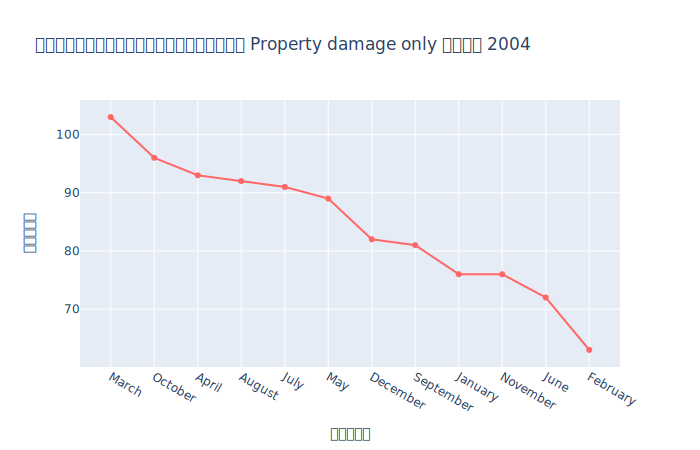

In [266]:
#ทำ Line Graph แสดงผล
d1 = roaddata_y[roaddata_y["Crash_Severity"] == "Property damage only"]

col = "Crash_Month"


vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))


trace1 = go.Scatter(x=vc1[col], y=vc1["count"], name="Property damage only", marker=dict(color="#ff6666"))

data = [trace1]

layout = go.Layout(title="จำนวนความรุนแรงประเภท Property damage only ในปี 2004",    xaxis_title= "เดือน",
    yaxis_title="จำนวน",legend=dict(x=0.05, y=1.15, orientation="h" , font_size=10))
fig = go.Figure(data, layout=layout )
fig.show(renderer='svg')

จากกราฟข้างบนนี้ เป็นการแสดงจำนวนการเกิดอุบัติเหตุในกรณีประเภท Property damage only ในปี 2004 พบว่าในช่วงเดือน March เป็นเดือนที่การเกิดอุบัติเหตุในกรณีที่เป็น Property damage only มากที่สุด คิดเป็นร้อยละ 10.15 รองลงมา October คิดเป็นร้อยละ 9.46 และ April คิดเป็นร้อยละ 9.17 

--------------------------------------------------------------------------------------------------------------------------------

### การเกิดอุบัติเหตุในแต่ละปี

In [334]:
yearly_Severity_count = roaddata.groupby('Crash_Year')['Crash_Severity'].count().reset_index()
yearly_Severity_count

,Crash_Year,Crash_Severity
0,2002,2346
1,2003,2445
2,2004,2448
3,2005,2522
4,2006,2331
5,2007,2419
6,2008,2457
7,2009,2444
8,2010,2352
9,2011,1326


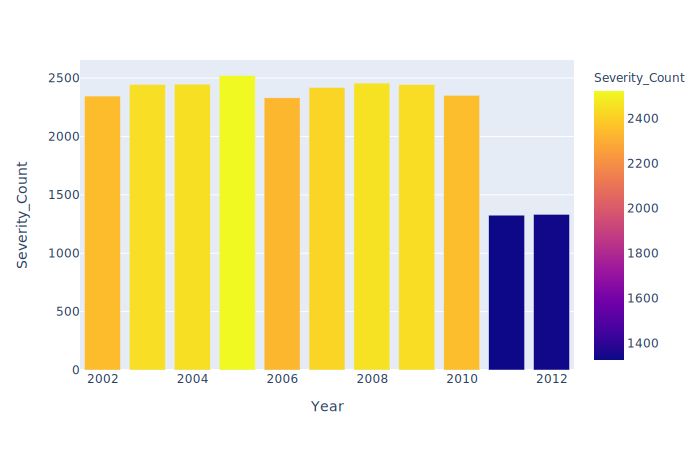

In [335]:
year_Severity_count = roaddata.groupby('Crash_Year')['Crash_Severity'].count().reset_index()
year_Severity_count = year_Severity_count.rename(columns = {'Crash_Severity':'Severity_Count','Crash_Year':'Year'})

fig = px.bar(year_Severity_count, x='Year', y='Severity_Count', color='Severity_Count', height=600)
fig.show()

###   การเกิดอุบัติเหตุในปี 2005 เดือนใดเกิดมากสุด?

การเกิดอุบัติเหตุในปี 2005 ที่มีการเกิดอุบัติเหตุมากที่สุด 

In [404]:
roaddata_y2005 = roaddata[(roaddata['Crash_Year'] == 2005)]
year2005_Severity_count = roaddata_y2005.groupby('Crash_Month')['Crash_Severity'].count().reset_index()
year2005_Severity_count['percent'] = year2005_Severity_count['Crash_Severity'].apply(lambda x : 100*x/sum(year2005_Severity_count['Crash_Severity']))
year2005_Severity_count = year2005_Severity_count.sort_values('Crash_Severity',ascending=False)
year2005_Severity_count.set_index('Crash_Month', inplace=True)
year2005_Severity_count

,Crash_Severity,percent
Crash_Month,,
April,244,9.674861
August,230,9.119746
October,230,9.119746
November,227,9.000793
March,210,8.326725
July,208,8.247423
May,207,8.207772
June,200,7.930214
February,195,7.731959


จากตารางข้างบนนี้ เป็นการแสดงจำนวนการเกิดอุบัติเหตุในปี 2005 พบว่าในช่วงเดือน April เป็นเดือนที่การเกิดอุบัติเหตุมากที่สุด คิดเป็นร้อยละ 9.67 รองลงมาเป็นเดือน August คิดเป็นร้อยละ 9.11 และเดือน October คิดเป็นร้อยละ 9.11

แต่เพราะอะไรในปี 2005 ณ เดือน April, August และ October ถึงมีการเกิดอุบัติเหตุมากสุด เราอาจจะสันนิษฐานได้ว่าอาจจะเป็นช่วง High season ที่ประชากรหรือนักท่องเที่ยวเยอะจึงมีการใช้รถใช้ถนนในการเดินทางเป็นจำนวนมาก จึงอาจส่งผลทำให้เกิดอุบัติเหตุได้ง่าย หรือจะปัจจัยจากสภาพอากาศในช่วงเดือนนั้นๆ ดังนั้นเราสามารถนำข้อมูลจากที่วิเคราะห์นี้ไปสืบสวนหาว่ามีปัจจัยอะไรส่งผลต่อการเกิดอุบัติเหตุได้

--------------------------------------------------------------------------------------------------------------------------------

In [417]:
roaddata_y2005 = roaddata[(roaddata['Crash_Year'] == 2005)].reset_index(drop=True) 

DCA_count = roaddata_y2005.groupby('Crash_DCA_Group_Description')['Crash_Severity'].count().reset_index()
DCA_count['percent'] = DCA_count['Crash_Severity'].apply(lambda x : 100*x/sum(DCA_count['Crash_Severity']))

DCA_count = DCA_count.sort_values('percent',ascending=False)
DCA_count.set_index('Crash_DCA_Group_Description', inplace=True)
DCA_count.head(5)


,Crash_Severity,percent
Crash_DCA_Group_Description,,
Rear-end,547,21.689136
Intersection from adjacent approaches,391,15.503569
Off carriageway on straight hit object,266,10.547185
Opposing vehicles turning,210,8.326725
Other,208,8.247423


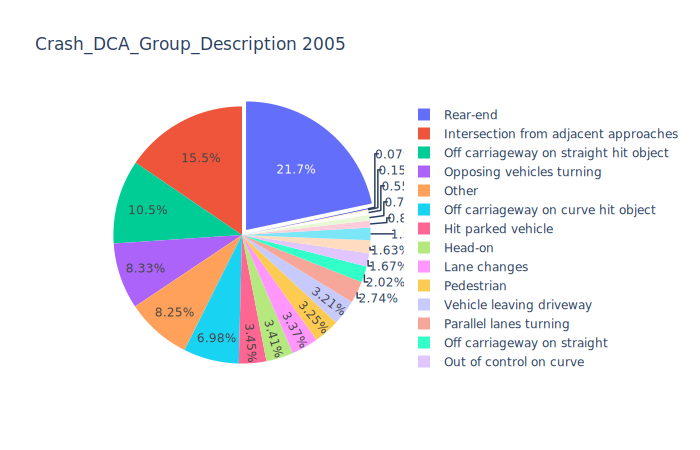

In [430]:

roaddata_y2005 = roaddata[(roaddata['Crash_Year'] == 2005)]
col1 = "Crash_DCA_Group_Description"


grouped = roaddata_y2005[col1].value_counts().reset_index() # ทำการ count value ใน column "Crash_Severity"
grouped = grouped.rename(columns = {col1 : "count", "index" : col1}) 

# ส่วนของ plot 


trace = go.Pie(labels=grouped[col1], values=grouped['count'], pull=[0.05, 0]) 
layout = go.Layout(title="Crash_DCA_Group_Description 2005 ", height=400, legend=dict(x=1, y=0.5, font_size=12))
fig = go.Figure(data = [trace], layout = layout)
fig.show(renderer='svg')

In [406]:

#roaddata_y2005 = roaddata[(roaddata['Crash_Year'] == 2005)]
#col = "Crash_DCA_Group_Description"

#grouped = roaddata_y2005[col].value_counts().reset_index() 
#grouped = roaddata_y2005[col].value_counts().reset_index() # ทำการ count value ใน column "Crash_Severity"
#grouped = grouped.rename(columns = {col : "count", "index" : col}) 

# ส่วนของ plot 

#trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=["#ff6666","#6699ff","#6ad49b", "#a678de","#ffff80"])) 
#layout = go.Layout(title="Crash Severity ", height=400, legend=dict(x=1, y=0.5, font_size=12))
#fig = go.Figure(data = [trace], layout = layout)
#fig.show(renderer='svg')
